# Line chart

In [10]:
# Prerequisites packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

np.random.seed(122)

In [11]:
def date_maker():
    dates=[]
    for i in range(30):
        dates.append(f'2025/6/{i+1}')
    return dates
dates = pd.Series(date_maker())
prices = pd.Series(np.random.randint(8000,100000,30))

df= pd.DataFrame(zip(dates,prices),columns=['Dates','Prices'])
df.head()

,Dates,Prices
0,2025/6/1,48431
1,2025/6/2,40666
2,2025/6/3,10442
3,2025/6/4,20214
4,2025/6/5,23692


<Axes: xlabel='Dates', ylabel='Prices'>

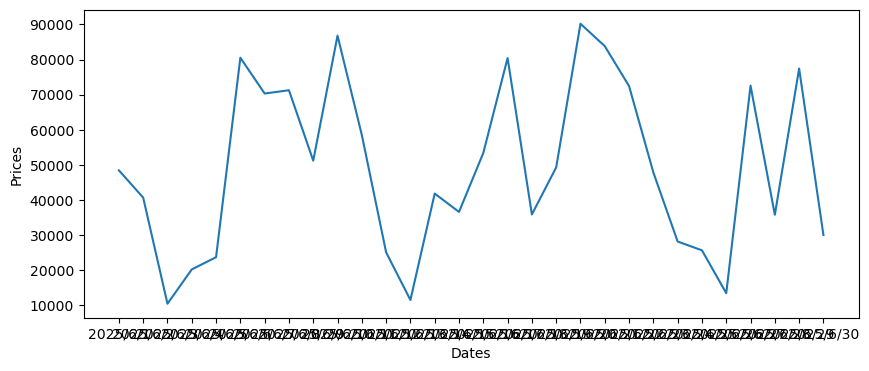

In [12]:
plt.figure(figsize=(10,4))
sns.lineplot(x='Dates',y='Prices',data=df)

In [14]:
from matplotlib import dates as dts
from datetime import datetime as dt

df.Dates = pd.to_datetime(df.Dates)
df['Month_day']= df.Dates.dt.strftime('%m/%d')
df.head()

,Dates,Prices,Month_day
0,2025-06-01,48431,06/01
1,2025-06-02,40666,06/02
2,2025-06-03,10442,06/03
3,2025-06-04,20214,06/04
4,2025-06-05,23692,06/05


<Axes: xlabel='Month_day', ylabel='Prices'>

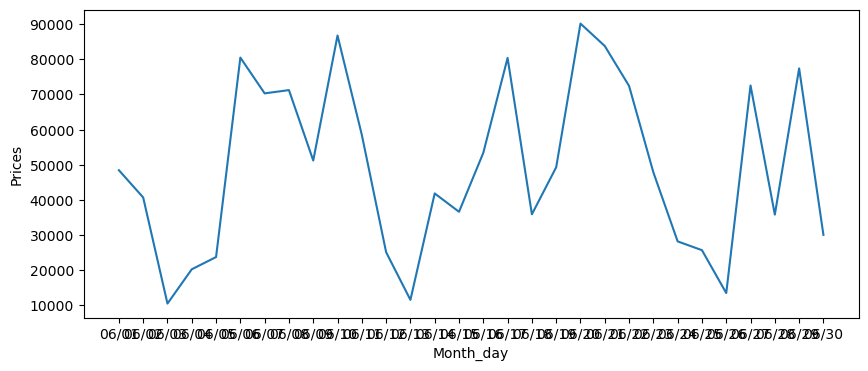

In [15]:
plt.figure(figsize=(10,4))
sns.lineplot(x='Month_day',y='Prices',data=df)

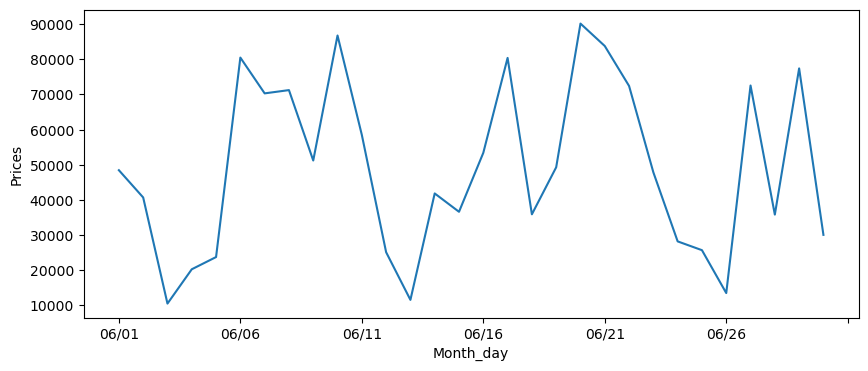

In [16]:
from matplotlib import ticker

plt.figure(figsize=(10,4))
sns.lineplot(x='Month_day',y='Prices',data=df)
#Get axes
ax=plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
plt.show()

In [19]:
df['Moving_avg'] = df.Prices.rolling(window=5).mean()
df.head(10)

,Dates,Prices,Month_day,Moving_avg
0,2025-06-01,48431,06/01,NaN
1,2025-06-02,40666,06/02,NaN
2,2025-06-03,10442,06/03,NaN
3,2025-06-04,20214,06/04,NaN
4,2025-06-05,23692,06/05,28689.0
5,2025-06-06,80510,06/06,35104.8
6,2025-06-07,70316,06/07,41034.8
7,2025-06-08,71247,06/08,53195.8
8,2025-06-09,51195,06/09,59392.0
9,2025-06-10,86799,06/10,72013.4


<Axes: xlabel='Month_day', ylabel='Moving_avg'>

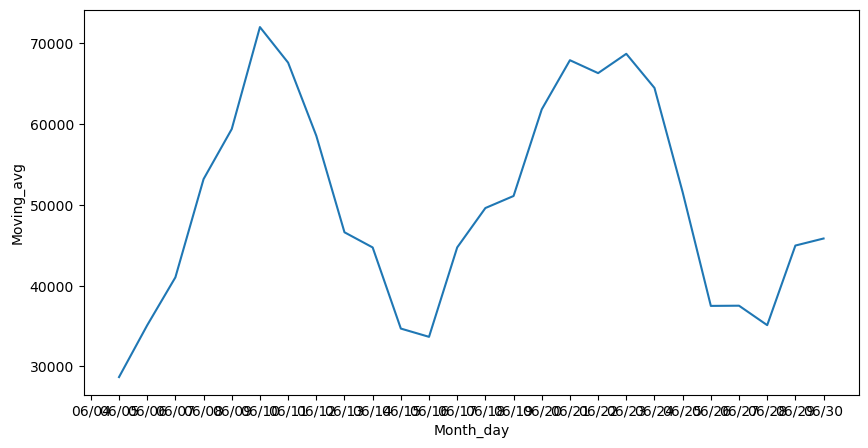

In [29]:
plt.figure(figsize=(10,5))
sns.lineplot(x='Month_day',y='Moving_avg',data=df)

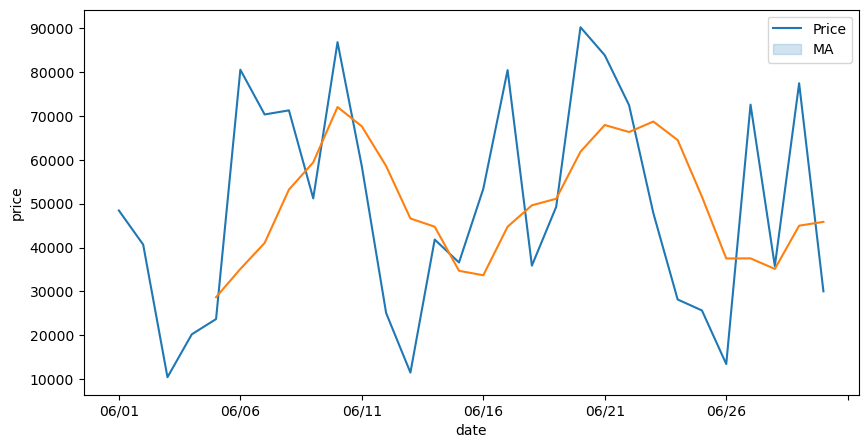

In [28]:
plt.figure(figsize=(10,5))
sns.lineplot(x='Month_day',y='Prices',data=df)
sns.lineplot(x='Month_day',y='Moving_avg',data=df)
ax=plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.set_xlabel('date')
ax.set_ylabel('price')
plt.legend(['Price','MA'])
plt.show()